In [112]:
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [114]:
import pickle
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)

In [115]:
X, y = df.drop(columns=['num']).values, df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
classifier = SVC()
print('Paramètres utilisés : \n')
pprint(classifier.get_params())

Paramètres utilisés : 

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [117]:
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

svc = SVC()


cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)


grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:    3.8s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=...one,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             pre_

In [158]:
print("Les meilleurs paramètres (d'après la GridSearch) sont :")
print(grid_search.best_params_)
print("")
print("La précision moyenne d'un modèle avec ces hyperparamètres est:")
print(grid_search.best_score_)

Les meilleurs paramètres (d'après la GridSearch) sont :
{'C': 0.01, 'kernel': 'linear', 'probability': True}

La précision moyenne d'un modèle avec ces hyperparamètres est:
0.8065843621399177


In [159]:
best_svc = grid_search.best_estimator_

In [160]:
best_svc.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**Regardons les résultats pour les données d'entrainement :**

In [161]:
svc_pred = best_svc.predict(X_test)

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

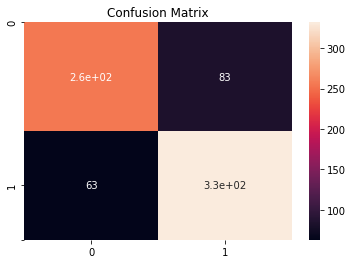

In [162]:
cm = confusion_matrix(y_train, best_svc.predict(X_train))

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)



plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy :

In [163]:
print("Accuracy pour les données d'entrainement : ")
print(accuracy_score(y_train, best_svc.predict(X_train)))

Accuracy pour les données d'entrainement : 
0.8010899182561307


* sensibilité : 

In [164]:
tpr = recall_score(y_train, best_svc.predict(X_train))
print("La sensibilité pour les données d'entrainement est : ")
print(tpr)

La sensibilité pour les données d'entrainement est : 
0.8405063291139241


* spécificité : 

In [165]:
tn, fp, fn, tp = cm.ravel()

In [166]:
tnr_train = 1 - fp/(tn+fp)
print("La spécificité pour les données d'entrainement est : ")
print(tnr)

La spécificité pour les données d'entrainement est : 
0.7638888888888888


* précision : 

In [167]:
print("La précision pour les données d'entrainement est : ")
print(precision_score(y_train, best_svc.predict(X_train)))

La précision pour les données d'entrainement est : 
0.8


* F-Measure : 

In [168]:
print("F-Measure pour les données d'entrainement : ")
print(f1_score(y_train, best_svc.predict(X_train)))

F-Measure pour les données d'entrainement : 
0.8197530864197532


**Résultats pour les données tests :**

* matrice de confusion :

Text(0.5, 1, 'Confusion Matrix')

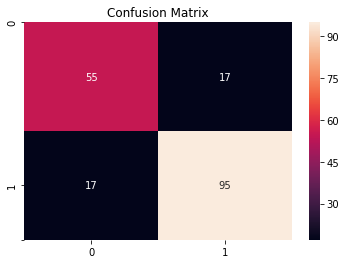

In [169]:
cm = confusion_matrix( svc_pred,y_test)

df_cm = pd.DataFrame(cm, index=['1','0'], columns = ['0','1'])
fig = plt.figure()
plt.clf()

res = sns.heatmap(df_cm, annot=True)

plt.yticks( [1.5,0,2], va='center')
plt.title('Confusion Matrix')

* accuracy :

In [170]:
# Test accuracy
print("Précision pour les données test : ")
print(accuracy_score(y_test, svc_pred))

Précision pour les données test : 
0.8152173913043478


* sensibilté : 

In [171]:
tpr = recall_score(y_test, svc_pred)
print("La sensibilité pour les données tests est : ")
print(tpr)

La sensibilité pour les données tests est : 
0.8482142857142857


* spécificité :

In [172]:
tn, fp, fn, tp = cm.ravel()

In [173]:
tnr_test = 1 - fp/(tn+fp)
print("La spécificité pour les données d'entrainement est : ")
print(tnr)

La spécificité pour les données d'entrainement est : 
0.7638888888888888


* précision : 

In [174]:
print("La précision pour les données test est : ")
print(precision_score(y_test, svc_pred))

La précision pour les données test est : 
0.8482142857142857


* F-Measure : 

In [175]:
print("F-Measure pour les données test : ")
print(f1_score(y_test, svc_pred))

F-Measure pour les données test : 
0.8482142857142857


**Regroupons les résultats dans un dataframe pandas :**

In [176]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(y_train, best_svc.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, svc_pred),
     'Training Set TPR' : recall_score(y_train, best_svc.predict(X_train)),
     'Test Set TPR' : recall_score(y_test, svc_pred),
     'Training Set PPV' : precision_score(y_train, best_svc.predict(X_train)),
     'Test Set PPV' : precision_score(y_test, svc_pred),
     'Training Set F-Measure' : f1_score(y_train, best_svc.predict(X_train)),
     'Test Set F-Measure' : f1_score(y_test, svc_pred),
     'Training Set TNR' : tnr_train,
     'Test Set TNR' : tnr_test
}

df_models_svm = pd.DataFrame(d, index=[0])
df_models_svm

,Model,Training Set Accuracy,Test Set Accuracy,Training Set TPR,Test Set TPR,Training Set PPV,Test Set PPV,Training Set F-Measure,Test Set F-Measure,Training Set TNR,Test Set TNR
0,SVM,0.80109,0.815217,0.840506,0.848214,0.8,0.848214,0.819753,0.848214,0.755162,0.763889


In [177]:
with open('df_models_svm.pickle', 'wb') as output:
    pickle.dump(df_models_svm, output)